# Assignment 5: Using previously computed deltas

- Łukasz Andryszewski 151930
- Filip Firkowski 151946

Link to the repository is: https://github.com/lucapl/Evolutionary-Computations.

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd

from utils import *
from plotting import *
pd.set_option('display.max_colwidth', None)

## Description of a problem:

The problem is about selecting exactly 50% of the nodes to form a Hamiltonian cycle that minimizes the total distance of the path and the total cost of the selected nodes.

In this report the candidate edges mechanism is evaluated. The goal being to speed up the steepest local search algorithm.

## Pseudocode of all implemented algorithms

<style>
  .no-page-break {
    page-break-inside: avoid;
  }
</style>

<div class="no-page-break">
  <h3>LM search:</h3>
  <pre>
solution = generate_initial_solution()
previous_moves = priorityQueue()

while solution_is_improving:
  generate_new_moves(previous_moves)

  for move in candidate_moves:
    calculate_move_cost_change(solution)

    if change_in_cost_negative:
      previous_moves.add(move)

    if change_in_cost_negative and cost_better_than_the_current_best:
      record_best_move()

  apply_move_to_solution(best_move)

  apply_previous_moves(solution, previous_moves)

return solution
  </pre>
</div>

<div class="no-page-break">
  <h3>Generating new moves</h3>
  <pre>
arg: previous_moves

new_moves = []
for i=0 in n:
  for j=i+1 in n:
    move = create_move(city_i,city_j)

    if move in previous_moves:
      continue
    if move is edge_swap:
      flip_edge1(move) //edge1 flipped
      if move in previous_moses: continue
      flip_edge2(move) //both flipped
      if move in previous_moses: continue
      flip_edge1(move) //edge2 flipped
      if move in previous_moses: continue

    new_moves.add(move)

return new_moves
  </pre>
</div>

<div class="no-page-break">
  <h3>Applying previous moves</h3>
  <pre>
arg: solution
arg: previous_moves

for move in previous_moves:
  determine_move_state(move, solution)
  if move is applicable:
    solution.apply(move)
    previous_moves.delete(move)
  if move is not_applicable:
    previous_moves.delete(move)
  if move is currently_not_applicable:
    continue
  </pre>
</div>

<div class="no-page-break">
  <h3>Determining move state</h3>
  <pre>
arg: move
arg: solution

if move is EdgeSwap:
  if move.edge1 not in solution or move.edge2 not in solution:
    return not_applicable
  if move.edge1 is flipped and move.edge2 is flipped:
    return applicable
  if move.edge1 is correct and move.edge2 is correct:
    return applicable
  return currenty_not_applicable

if move is Inter:
  if move.cityInside not in solution or move.cityOutside in solution:
    return not_applicable
  if move.neighbourhood != solution.neighbourhood(move.cityInside):
    return not_applicable

  return applicable
  </pre>
</div>

<style>
  table {
    width: 100%;
    table-layout: fixed;
    word-wrap: break-word;
  }
</style>

## Results of a computational experiments

In [2]:
sep = '-'
startTypes = ["Random"];
instances = ['A', 'B']

solver_types = [sep.join(["localSearch","Steepest","Edges","Random"]), sep.join(["lmSearch","Random"])]

folder_path = '../out'

import json
with open(f'{folder_path}/{solver_types[1]}.json', 'r') as file:
    data = json.load(file)

with open(f'{folder_path}/{solver_types[0]}.json', 'r') as file:
    prev_data = json.load(file)

#all_json_data = load_json_files_from_folder(folder_path)

all_json_data = data.get("solutions").get("A").get("solutions") + data.get("solutions").get("B").get("solutions") + prev_data.get("solutions").get("A").get("solutions") + prev_data.get("solutions").get("B").get("solutions") 

table, best_solutions = get_best_solutions_and_vertical_table(solver_types,instances,all_json_data)

In [3]:
display_html(table,False)

Method,Instance A,Instance B
localSearch-Steepest-Edges-Random,73752.1 (71060.0-76504.0),48393.9 (45299.0-51819.0)
lmSearch-Random,73722.5 (71291.0-78435.0),48132.9 (45776.0-51330.0)


<p style="page-break-after:always;"></p>

Table containing elapsed time in ms.

In [4]:
timeTable, _ = get_best_solutions_and_vertical_table(solver_types,instances,all_json_data,"elapsed time")

display_html(timeTable,False)

Method,Instance A,Instance B
localSearch-Steepest-Edges-Random,271.7 (206.7-581.5),246.4 (202.5-366.0)
lmSearch-Random,76.4 (54.1-412.6),77.5 (53.1-254.5)


## Best solutions:

The following solutions were checked with the solution checker.

In [5]:
print_solutions([solver_types[1]],instances,best_solutions)

Solver type: lmSearch-Random
                	Instance: A
                	City costs: 47903.0
                	Edge Length: 23388.0
                	Objective function: 71291.0
                	Solution:
[2, 152, 97, 1, 101, 75, 86, 26, 100, 121, 124, 94, 63, 53, 180, 154, 135, 70, 127, 112, 84, 184, 190, 10, 177, 54, 48, 34, 146, 22, 18, 108, 69, 159, 193, 41, 181, 160, 42, 43, 116, 65, 59, 123, 162, 151, 133, 79, 80, 176, 51, 118, 115, 139, 46, 68, 93, 117, 0, 143, 183, 89, 23, 137, 186, 15, 148, 9, 62, 102, 49, 144, 14, 178, 106, 52, 55, 185, 40, 119, 165, 90, 81, 196, 179, 145, 92, 57, 129, 82, 25, 78, 31, 56, 113, 175, 171, 16, 44, 120]
                	Solution length: 100
                	No repeats?: True
                	Starting from: 63
                	Elapsed Time: 78.8583

                	Iterations: 11
                  

                	Instance: B
                	City costs: 26259.0
                	Edge Length: 19517.0
                	Objective function: 45776.0


## 2D visualizations:

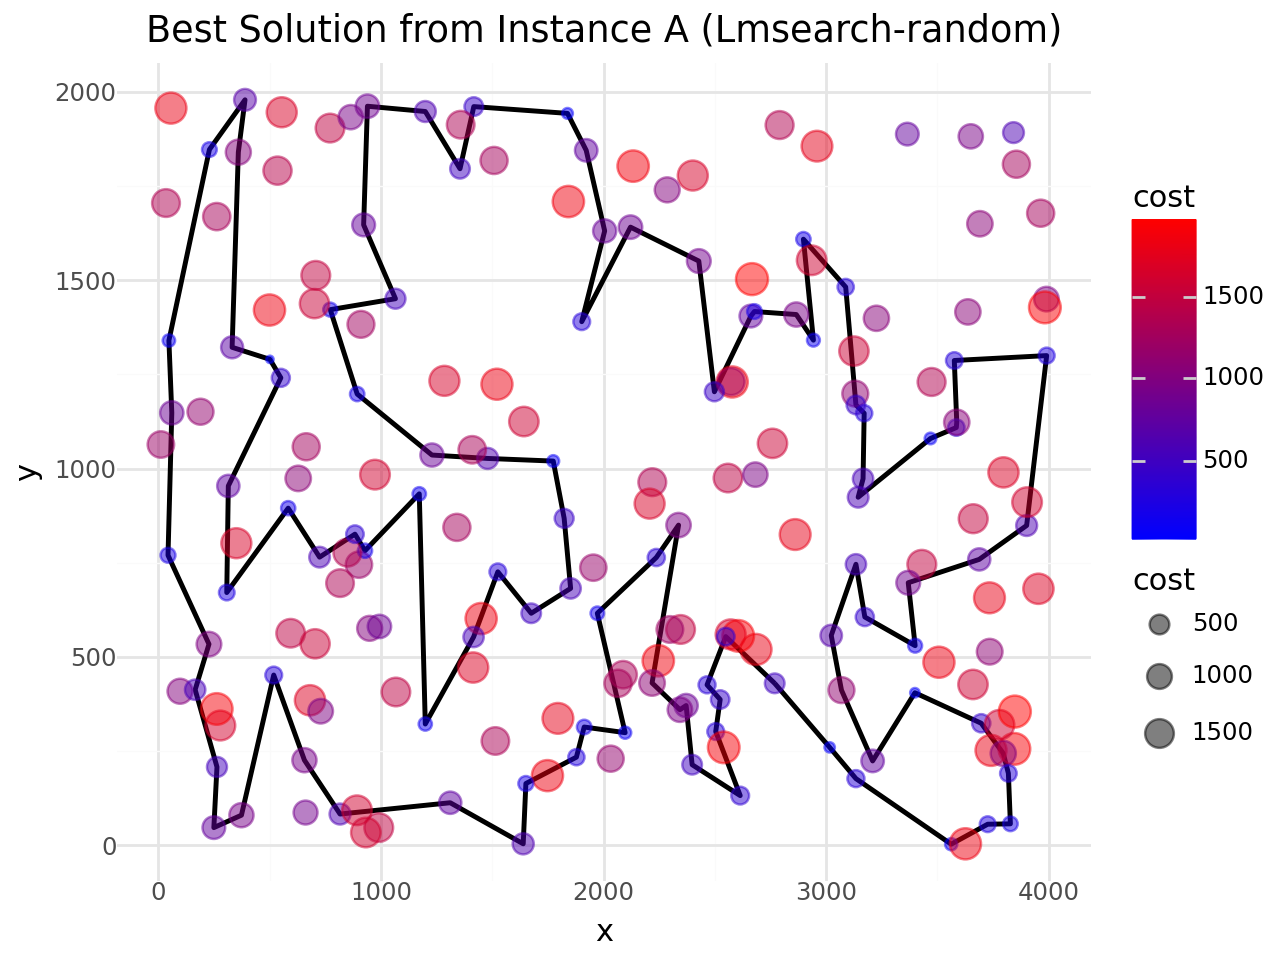

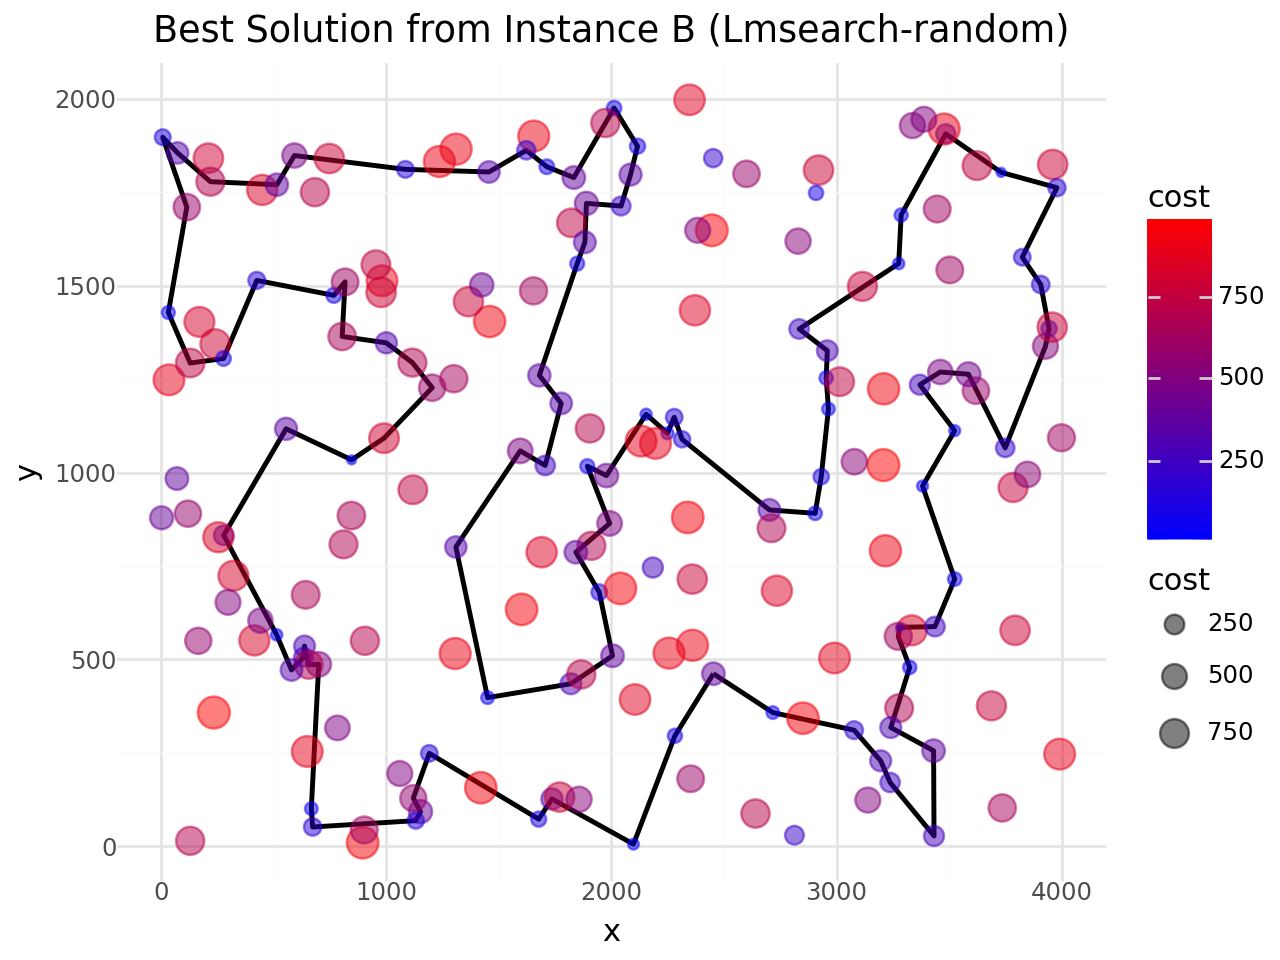

In [6]:
import warnings
warnings.filterwarnings("ignore")

coordinates = {
    'A': load_coordinates_from_csv('../src/main/resources/instances/TSPA.csv'),
    'B': load_coordinates_from_csv('../src/main/resources/instances/TSPB.csv')
}

plot_all([solver_types[1]], instances, coordinates, best_solutions)

# Conclusions:

Overall, using previously calculated move evaluation deltas in the steepest local search significantly improves the algorithm's efficiency. By reusing previously evaluated moves, the algorithm avoids redundant calculations, speeding up the search process.

However, there is some negative impact on the minimal and maximal solutions. There is a trade-off between algorithm efficiency and the quality of the solutions produced. The trade-off could be caused by big jumps in the fitness landscape, by performing all the improving moves at once.

The performance is largely dependent on the number of improving moves in the list and how frequently new candidate moves are evaluated. If the list of improving moves is large or if moves are evaluated at each step, the algorithm performs similarly to the baseline steepest local search with random starting solutions, which does not utilize these mechanisms.

In summary, while the move evaluation delta mechanism increases efficiency, the solution quality remains close to the baseline approach. The choice between these methods depends on the specific needs for speed versus solution quality.